In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
def missing_report_gen(covid_df):
    missing_values = covid_df.isnull().sum()
    missing_percent = (missing_values / len(covid_df)) * 100
    missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percent Missing': missing_percent})
    missing_report = missing_report[missing_report['Missing Values'] >= 0]
    
    return missing_report

In [24]:
def assign_income_group(gdp):
    if gdp < 2085:
        return 'Low income'
    elif gdp < 4256:
        return 'Lower-middle income'
    elif gdp < 13206:
        return 'Upper-middle income'
    else:
        return 'High income'

In [50]:
covid_df = pd.read_csv('owid_covid_data.csv')


# Removing columns 
high_missing_cols = covid_df.columns[covid_df.isnull().mean() > 0.90]
medium_missing_cols = covid_df.columns[(covid_df.isnull().mean() > 0.50) & (covid_df.isnull().mean() <= 0.90)]

covid_df_clean = covid_df.drop(columns=high_missing_cols).drop(columns=medium_missing_cols)

covid_df_clean['case_fatality_rate'] = covid_df_clean['total_deaths'] / covid_df_clean['total_cases']
covid_df_clean['log_total_cases'] = np.log1p(covid_df_clean['total_cases'])
covid_df_clean['log_total_deaths'] = np.log1p(covid_df_clean['total_deaths'])
covid_df_clean = covid_df_clean.dropna(subset=['gdp_per_capita', 'total_cases', 'total_deaths', 'population', 'human_development_index', ])


#covid_df_clean['income_group'] = pd.qcut(covid_df_clean['gdp_per_capita'], q=4, labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])
covid_df_clean['income_group'] = covid_df_clean['gdp_per_capita'].apply(assign_income_group)

# Define the correct order
income_order = ['Low income', 'Lower-middle income', 'Upper-middle income', 'High income']

# Convert to an ordered categorical variable
covid_df_clean['income_group'] = pd.Categorical(
    covid_df_clean['income_group'],
    categories=income_order,
    ordered=True
)


covid_df_clean = covid_df_clean.sort_values('date').groupby('location').last().reset_index()

covid_df_clean['infection_rate'] = covid_df_clean['total_cases'] / covid_df_clean['population']
covid_df_clean['fatality_rate'] = covid_df_clean['total_deaths'] / covid_df_clean['total_cases']

grouped_rates = covid_df_clean.groupby('income_group')[['infection_rate', 'fatality_rate']].mean().reset_index()



C:\Users\khang\AppData\Local\Temp\ipykernel_3876\747213414.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rates = covid_df_clean.groupby('income_group')[['infection_rate', 'fatality_rate']].mean().reset_index()


C:\Users\khang\AppData\Local\Temp\ipykernel_3876\3235594029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_group', y='infection_rate', data=grouped_rates, ax=axes[0], palette='Blues')
C:\Users\khang\AppData\Local\Temp\ipykernel_3876\3235594029.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_group', y='fatality_rate', data=grouped_rates, ax=axes[1], palette='Reds')


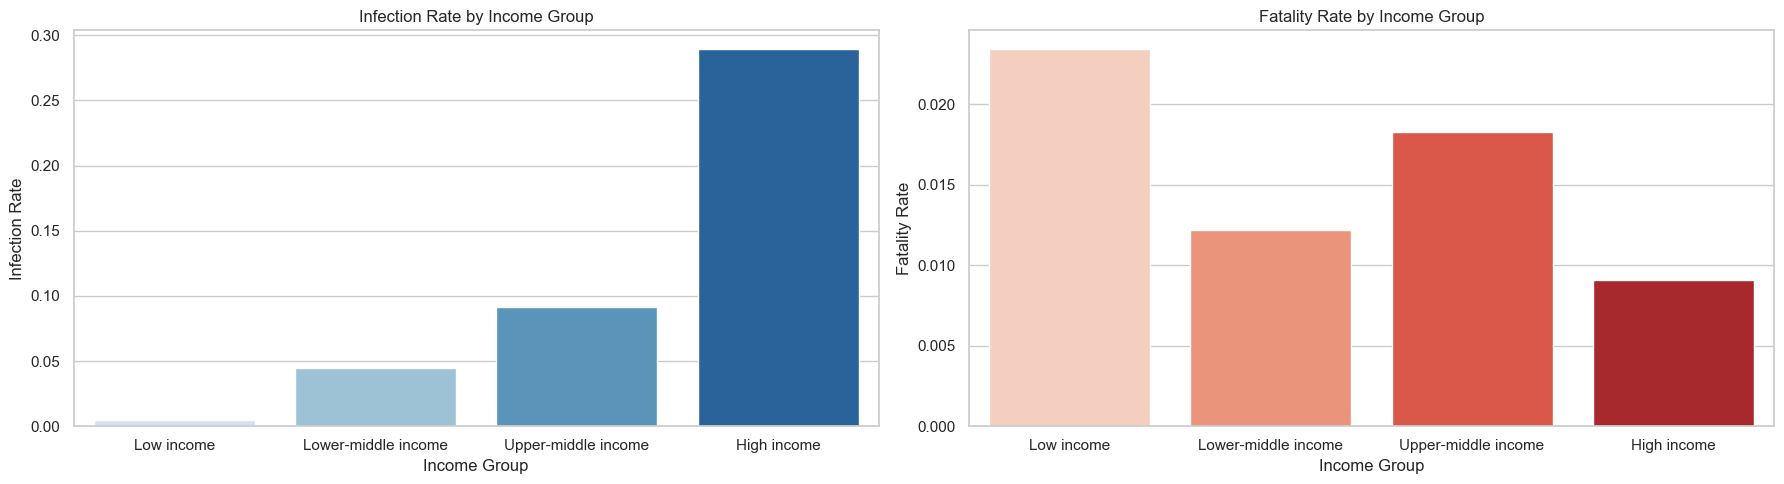

In [51]:
sns.set(style="whitegrid")


# Create a figure with subplots for each rate
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot Infection Rate
sns.barplot(x='income_group', y='infection_rate', data=grouped_rates, ax=axes[0], palette='Blues')
axes[0].set_title('Infection Rate by Income Group')
axes[0].set_ylabel('Infection Rate')
axes[0].set_xlabel('Income Group')

# Plot Fatality Rate
sns.barplot(x='income_group', y='fatality_rate', data=grouped_rates, ax=axes[1], palette='Reds')
axes[1].set_title('Fatality Rate by Income Group')
axes[1].set_ylabel('Fatality Rate')
axes[1].set_xlabel('Income Group')

plt.tight_layout()

this visualization uses the latest data for each country

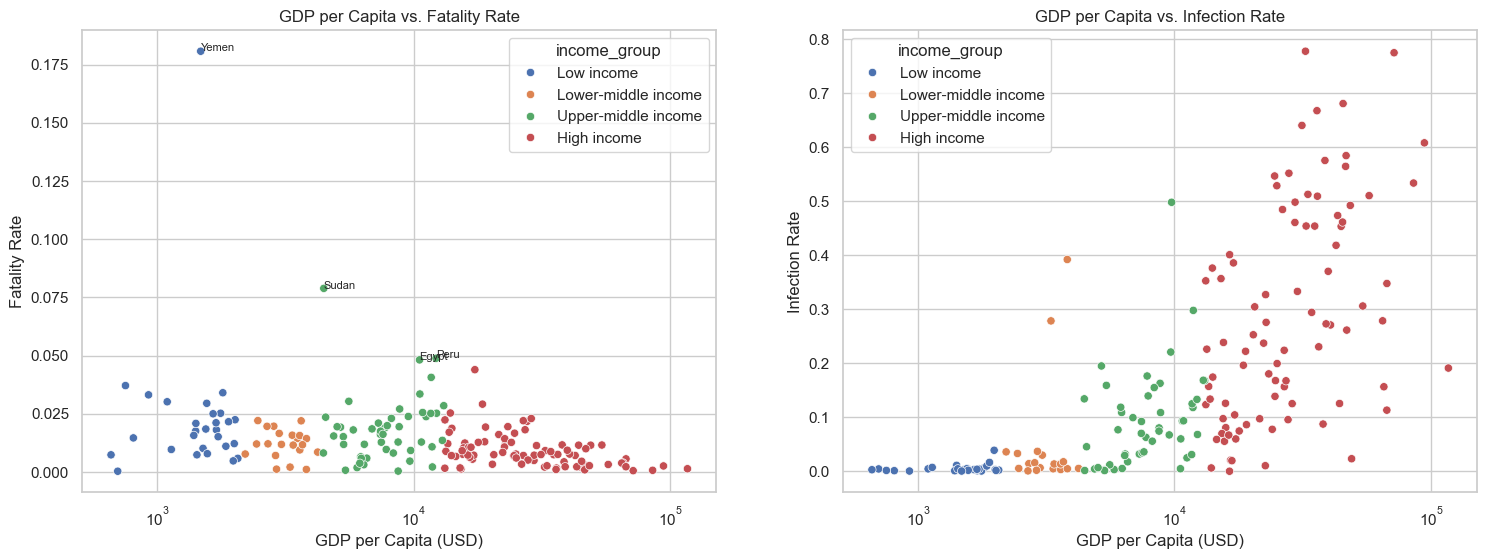

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data=covid_df_clean, x='gdp_per_capita', y='fatality_rate', hue='income_group', ax=axes[0])
axes[0].set_title('GDP per Capita vs. Fatality Rate')
axes[0].set_xlabel('GDP per Capita (USD)')
axes[0].set_ylabel('Fatality Rate')
axes[0].set_xscale('log')  

for i, row in covid_df_clean.iterrows():
    if row['fatality_rate'] > 0.045:  # Example thresholds
        axes[0].text(row['gdp_per_capita'], row['fatality_rate'], row['location'], fontsize=8)


sns.scatterplot(data=covid_df_clean, x='gdp_per_capita', y='infection_rate', hue='income_group', ax=axes[1])
axes[1].set_title('GDP per Capita vs. Infection Rate')
axes[1].set_xlabel('GDP per Capita (USD)')
axes[1].set_ylabel('Infection Rate')
axes[1].set_xscale('log')  


plt.grid(True)
plt.show()

C:\Users\khang\AppData\Local\Temp\ipykernel_3876\1829649939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_group', y='infection_rate', data=covid_df_clean, ax=axes[0], palette='Blues')
C:\Users\khang\AppData\Local\Temp\ipykernel_3876\1829649939.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_group', y='fatality_rate', data=covid_df_clean, ax=axes[1], palette='Reds')


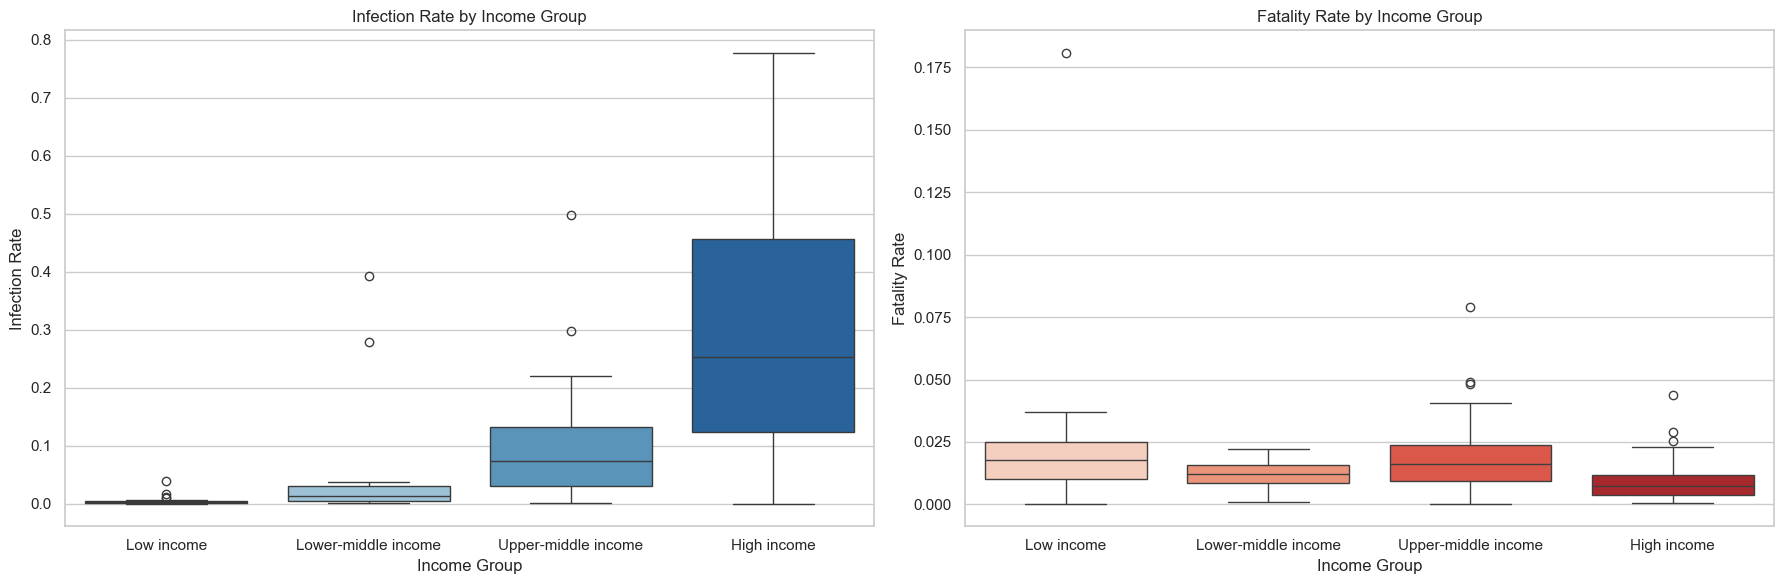

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Infection Rate Boxplot
sns.boxplot(x='income_group', y='infection_rate', data=covid_df_clean, ax=axes[0], palette='Blues')
axes[0].set_title('Infection Rate by Income Group')
axes[0].set_ylabel('Infection Rate')
axes[0].set_xlabel('Income Group')

# Fatality Rate Boxplot
sns.boxplot(x='income_group', y='fatality_rate', data=covid_df_clean, ax=axes[1], palette='Reds')
axes[1].set_title('Fatality Rate by Income Group')
axes[1].set_ylabel('Fatality Rate')
axes[1].set_xlabel('Income Group')


plt.tight_layout()
plt.show()

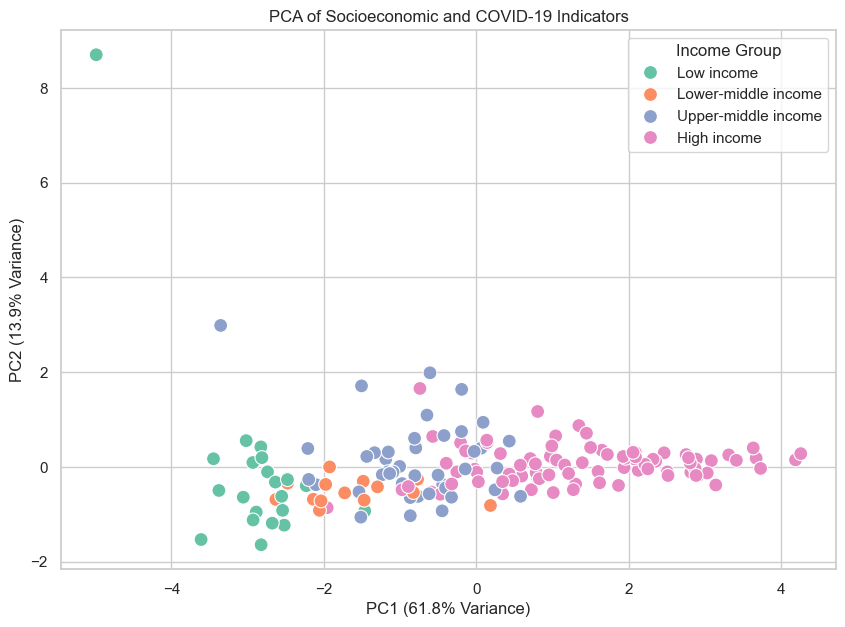

In [55]:
# Select features for PCA (socioeconomic + COVID outcomes)
features = ['gdp_per_capita', 'life_expectancy', 'human_development_index',
            'hospital_beds_per_thousand', 'infection_rate', 'fatality_rate']

# Drop rows with missing values in selected features
pca_df = covid_df_clean.dropna(subset=features + ['income_group'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df[features])

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_result = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_result['income_group'] = pca_df['income_group'].values

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_result, x='PC1', y='PC2', hue='income_group', palette='Set2', s=100)
plt.title('PCA of Socioeconomic and COVID-19 Indicators')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)')
plt.legend(title='Income Group')
plt.grid(True)
plt.show()